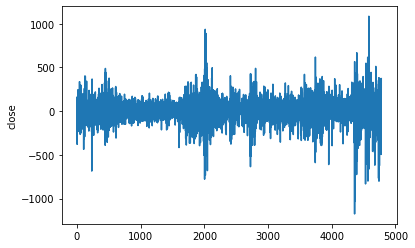

Epoch 1/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0444 - val_loss: 0.0432
Epoch 2/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0398 - val_loss: 0.0417
Epoch 3/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0388 - val_loss: 0.0595
Epoch 4/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0385 - val_loss: 0.0374
Epoch 5/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0382 - val_loss: 0.0366
Epoch 6/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0378 - val_loss: 0.0402
Epoch 7/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0379 - val_loss: 0.0582
Epoch 8/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0376 - val_loss: 0.0355
Epoch 9/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0377 - val_loss: 0.0357
Epoch 10/10
500/500 [==============================] - 17s 35ms/step - loss: 0.037

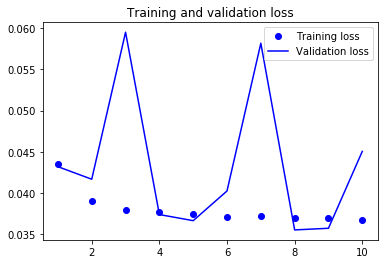

In [12]:
import os
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('C:\\Users\\Mirela\\PycharmProjects\\untitled2\\data_dir\\DJI.csv',
                      usecols=[4]).values.astype('float32')


def delta_time_series(data):
    return data[1:] - data[:-1]


dataset.shape


def plot_delta(data):
    plt.plot(delta_time_series(data))
    plt.ylabel('close')
    plt.show()


plot_delta(dataset)

dataset = delta_time_series(dataset)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets

train, val, test = dataset[0:2000, :], dataset[2001:3000, :], dataset[3001:None, :]

lookback = 5
step = 1
batch_size = 128

train_data_gen = TimeseriesGenerator(train, train,
                                     length=lookback, sampling_rate=step, stride=1,
                                     batch_size=batch_size)

val_data_gen = TimeseriesGenerator(val, val,
                                   length=lookback, sampling_rate=step, stride=1,
                                   batch_size=batch_size)

test_data_gen = TimeseriesGenerator(test, test,
                                    length=lookback, sampling_rate=step, stride=1,
                                    batch_size=batch_size)

val_steps = (3000 - 2001 - lookback)
test_steps = (len(dataset) - 3001 - lookback)

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()

model.add(layers.Flatten(input_shape=(lookback // step,
                                      dataset.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Epoch 1/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0435 - val_loss: 0.0366
Epoch 2/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0388 - val_loss: 0.0416
Epoch 3/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0384 - val_loss: 0.0576
Epoch 4/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0381 - val_loss: 0.0369
Epoch 5/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0379 - val_loss: 0.0357
Epoch 6/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0375 - val_loss: 0.0401
Epoch 7/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0376 - val_loss: 0.0569
Epoch 8/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0374 - val_loss: 0.0382
Epoch 9/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0373 - val_loss: 0.0358
Epoch 10/10
500/500 [==============================] - 18s 35ms/step - loss: 0.037

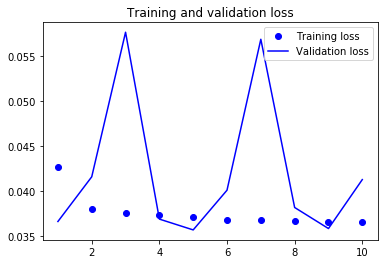

In [13]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0537 - val_loss: 0.0767
Epoch 2/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0386 - val_loss: 0.0426
Epoch 3/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0377 - val_loss: 0.0595
Epoch 4/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0374 - val_loss: 0.0362
Epoch 5/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0373 - val_loss: 0.0472
Epoch 6/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0373 - val_loss: 0.0421
Epoch 7/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0372 - val_loss: 0.0566
Epoch 8/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0371 - val_loss: 0.0352
Epoch 9/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0371 - val_loss: 0.0368
Epoch 10/10
500/500 [==============================] - 18s 36ms/step - loss: 0.037

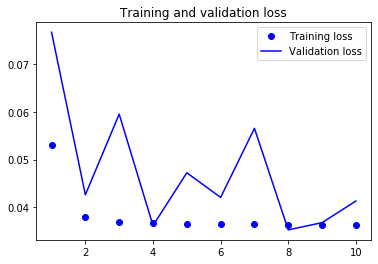

In [14]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0513 - val_loss: 0.0355
Epoch 2/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0379 - val_loss: 0.0464
Epoch 3/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0377 - val_loss: 0.0572
Epoch 4/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0375 - val_loss: 0.0356
Epoch 5/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0373 - val_loss: 0.0363
Epoch 6/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0373 - val_loss: 0.0401
Epoch 7/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0372 - val_loss: 0.0565
Epoch 8/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0372 - val_loss: 0.0355
Epoch 9/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0371 - val_loss: 0.0358
Epoch 10/10
500/500 [==============================] - 18s 35ms/step - loss: 0.037

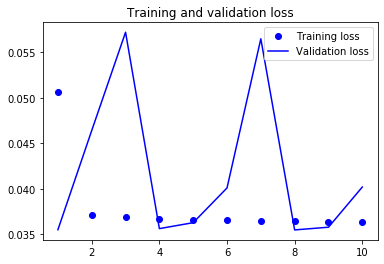

In [15]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 20s 40ms/step - loss: 0.0538 - val_loss: 0.0767
Epoch 2/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0386 - val_loss: 0.0565
Epoch 3/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0376 - val_loss: 0.0574
Epoch 4/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0375 - val_loss: 0.0352
Epoch 5/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0373 - val_loss: 0.0404
Epoch 6/10
500/500 [==============================] - 19s 37ms/step - loss: 0.0373 - val_loss: 0.0435
Epoch 7/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0372 - val_loss: 0.0569
Epoch 8/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0371 - val_loss: 0.0361
Epoch 9/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0372 - val_loss: 0.0384
Epoch 10/10
500/500 [==============================] - 19s 37ms/step - loss: 0.037

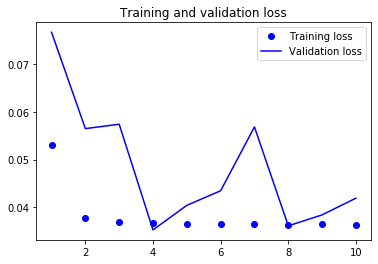

In [24]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
model.evaluate_generator(test_data_gen,steps=test_steps)


0.04033493623137474

In [33]:
testPredict = model.predict_generator(test_data_gen)
testPredict.shape

(1772, 1)